In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sergi\Desktop\Sergio - Data Analysis\___M___L___\csv\Adult_Arrests.csv")

C:\Users\sergi\AppData\Local\Temp\ipykernel_20356\531696736.py:1: DtypeWarning: Columns (7,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sergi\Desktop\Sergio - Data Analysis\___M___L___\csv\Adult_Arrests.csv")


In [3]:
df.head()

,TYPE,YEAR,DATE_,HOUR,CCN,ARREST_NUMBER,AGE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,...,OFFENSE_DISTRICT,ARREST_LATITUDE,ARREST_LONGITUDE,OFFENSE_LATITUDE,OFFENSE_LONGITUDE,GIS_ID,CREATED,EDITED,GLOBALID,OBJECTID
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,37,Out of State,Out of State,WHITE,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_1,NaN,2025/03/04 02:03:21+00,{80CA3650-32C9-42C6-8412-9250D0E433BF},1
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,39,602,6D,BLACK,...,6D,NaN,NaN,NaN,NaN,ADULT_ARRESTS_2,NaN,2025/03/04 02:03:21+00,{F1B2E42E-38B5-49D6-8A60-BF8CF0690A12},2
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,40,Out of State,Out of State,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_3,NaN,2025/03/04 02:03:21+00,{7F8BA37F-51F5-437F-A8F4-4B755385797B},3
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,65,502,5D,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_4,NaN,2025/03/04 02:03:21+00,{70B94138-C9F4-4CFF-9A72-12B071F3A78C},4
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...,31,702,7D,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_5,NaN,2025/03/04 02:03:21+00,{2DCB5E7E-311F-48B8-A36B-BF1D6C2890F5},5


In [4]:
df.columns

Index(['TYPE', 'YEAR', 'DATE_', 'HOUR', 'CCN', 'ARREST_NUMBER', 'AGE',
       'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX',
       'CATEGORY', 'DESCRIPTION', 'ARREST_PSA', 'ARREST_DISTRICT',
       'ARREST_BLOCKX', 'ARREST_BLOCKY', 'OFFENSE_BLOCKY', 'OFFENSE_BLOCKX',
       'OFFENSE_PSA', 'OFFENSE_DISTRICT', 'ARREST_LATITUDE',
       'ARREST_LONGITUDE', 'OFFENSE_LATITUDE', 'OFFENSE_LONGITUDE', 'GIS_ID',
       'CREATED', 'EDITED', 'GLOBALID', 'OBJECTID'],
      dtype='object')

### CHECKING FOR MISSING VALUES AND REMOVING THEM

In [6]:
df.isnull().sum()

TYPE                       0
YEAR                       0
DATE_                      0
HOUR                       0
CCN                       43
ARREST_NUMBER              0
AGE                        0
DEFENDANT_PSA          48072
DEFENDANT_DISTRICT     47789
RACE                       0
ETHNICITY              45899
SEX                        0
CATEGORY                  12
DESCRIPTION               41
ARREST_PSA              2343
ARREST_DISTRICT         2255
ARREST_BLOCKX           2834
ARREST_BLOCKY           2834
OFFENSE_BLOCKY          1097
OFFENSE_BLOCKX          1097
OFFENSE_PSA              654
OFFENSE_DISTRICT         538
ARREST_LATITUDE         3017
ARREST_LONGITUDE        3017
OFFENSE_LATITUDE         857
OFFENSE_LONGITUDE        857
GIS_ID                     0
CREATED               210740
EDITED                     0
GLOBALID                   0
OBJECTID                   0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(54477, 31)

ARREST PATTERN

Categorical classification

In [9]:
df_sex = df.groupby('SEX').size().reset_index(name = 'Numbers') #Classifying crime numbers by sex
df_sex

,SEX,Numbers
0,FEMALE,13359
1,MALE,41107
2,UNKNOWN,11


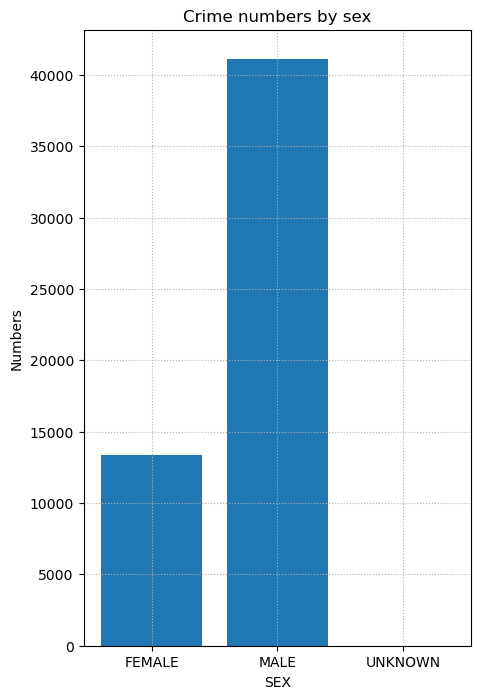

In [10]:
plt.figure(figsize = (5,8)) ##Plotting crime numbers by sex
plt.bar(df_sex["SEX"],df_sex["Numbers"])
plt.ylabel("Numbers")
plt.xlabel("SEX")
plt.title("Crime numbers by sex")
plt.grid(which = 'both', linestyle = ':')

CONTINUOUS DATA CLASSIFICATION

In [12]:
df_age = df.groupby('AGE').size().reset_index(name = "Numbers") #classifying data by age
df_age

,AGE,Numbers
0,18,1222
1,19,1362
2,20,1510
3,21,1554
4,22,1563
...,...,...
67,86,2
68,88,1
69,92,1
70,94,1


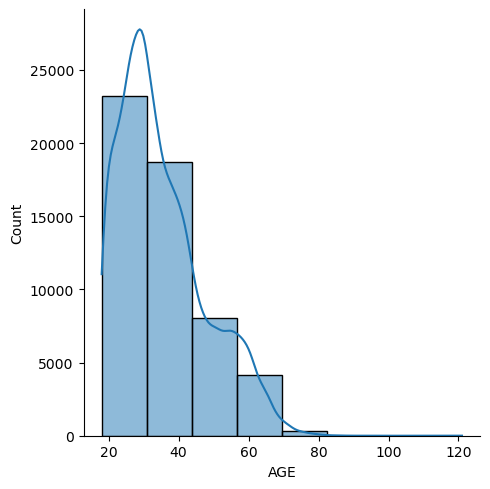

In [13]:
sns.displot(df['AGE'], kde = True, bins = 8)

In [14]:
df_min = df['AGE'].min()
df_max = df['AGE'].max()
print(df_min, df_max)

18 121


#### DETECTING ANOMALIES

THE EASIEST WAY TO DETECT ANOMALIES IS USING WHISKERS OR BOXPLOTS

<Axes: ylabel='AGE'>

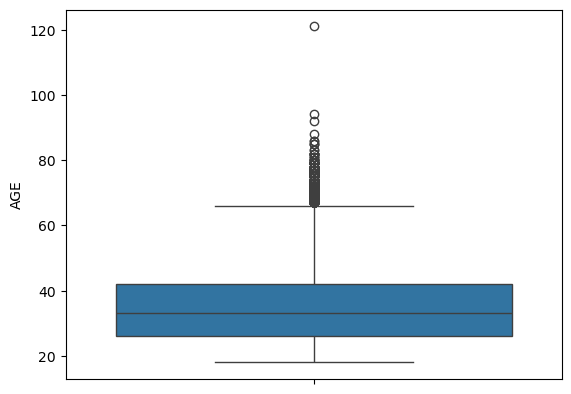

In [17]:
sns.boxplot(df['AGE'])

Calculate the upper and the lower limits

In [19]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [20]:
IQR

16.0

### ELIMINATE OUTLIERS

In [22]:
df_no_outliers = df[(df['AGE'] >= lower) & (df['AGE'] >= upper)]
print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers")
df_clean = df_no_outliers.copy()

Removed 53588 outliers
